# Data Viz Playground
Started 3/8/2022

For trying out different graphs and visualizations.

Below are the imports for getting the data and putting it in a usable format. If you want to see the breakdown of this, check `ml_playground.ipynb`.

In [27]:
import json
import pandas as pd
import urllib.request as rq

COVID_WHOLE_DATA_URL = "https://covid.ourworldindata.org/data/owid-covid-data.json"

with rq.urlopen(COVID_WHOLE_DATA_URL) as url:
    covid_data = json.loads(url.read().decode())
    covid_df = pd.DataFrame(covid_data)

usa_df = covid_df['USA'].copy()
full_df = pd.DataFrame.from_dict(usa_df.data)

full_df.head()

,date,total_cases,total_cases_per_million,stringency_index,new_cases,new_cases_per_million,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,...,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,total_boosters,total_boosters_per_hundred
0,2020-01-22,1.0,0.003,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,1.0,0.003,0.0,0.0,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,2.0,0.006,0.0,1.0,0.003,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,2.0,0.006,0.0,0.0,0.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,5.0,0.015,0.0,3.0,0.009,-8925.0,-3.59,-2.63,-26.808639,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# For refreshing the DF after mistakes
data = full_df.copy()

<AxesSubplot:xlabel='date', ylabel='new_cases'>

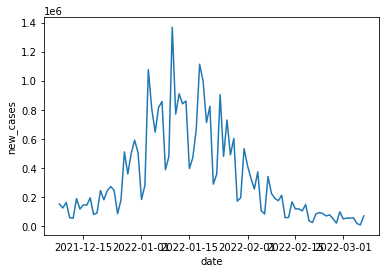

In [40]:
import seaborn as sns

sns.lineplot(data=data["new_cases"].tail(90))

## We got the chart!
Now we'll begin formatting it to look more presentable.

What makes it look more presentable? A legend, title, labelling our axes, and generally being able to understand it. For instance, the y-axis is already labeled but since it's to the power of 6 it can be hard to understand by just looking at it.

Also notice that the x-axis is using the default index from the dataframe. We'll be changing that to date.

In [39]:
data["date"] = pd.to_datetime(data["date"]) # Yes, it is necessary.
data.set_index("date", inplace=True)
data.head()

,total_cases,total_cases_per_million,stringency_index,new_cases,new_cases_per_million,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,new_cases_smoothed,...,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,total_boosters,total_boosters_per_hundred
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,1.0,0.003,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,1.0,0.003,0.0,0.0,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,2.0,0.006,0.0,1.0,0.003,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,2.0,0.006,0.0,0.0,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,5.0,0.015,0.0,3.0,0.009,-8925.0,-3.59,-2.63,-26.808639,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='date', ylabel='new_cases'>

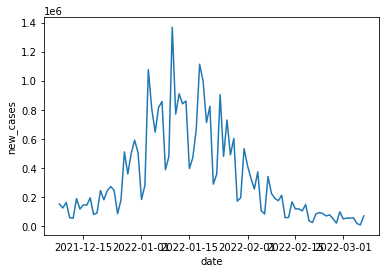

In [42]:
# Now we have dates in the x-axis
sns.lineplot(data=data["new_cases"].tail(90))

In [44]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:title={'center':'New Cases over the last 90 days'}, xlabel='Date', ylabel='New Cases'>

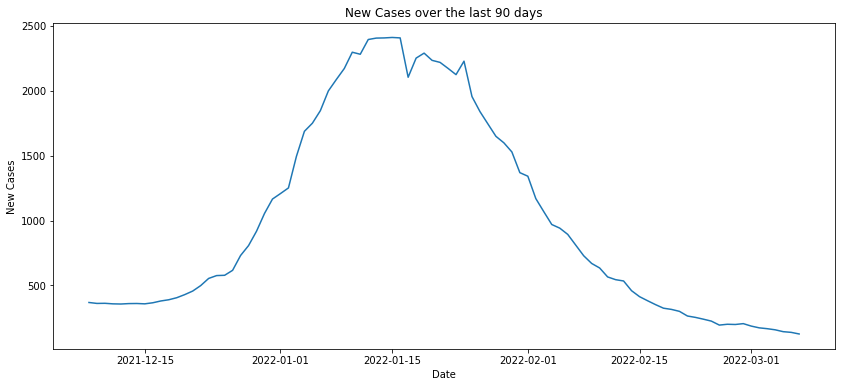

In [59]:
# Increase the size of the plot
plt.figure(figsize=(14,6))

# Label the axes and give it a title
plt.title("New Cases over the last 90 days")
plt.xlabel("Date")
plt.ylabel("New Cases")

# Now to tackle the 1e6 x-axis
plt.ticklabel_format(style="plain", axis="y")

sns.lineplot(data=data["new_cases_smoothed_per_million"].tail(90))

## Now let's add multiple lines!

<AxesSubplot:title={'center':'New Cases & Vaccinations Smoothed over the last 90 days'}, xlabel='Date', ylabel='Per Million People'>

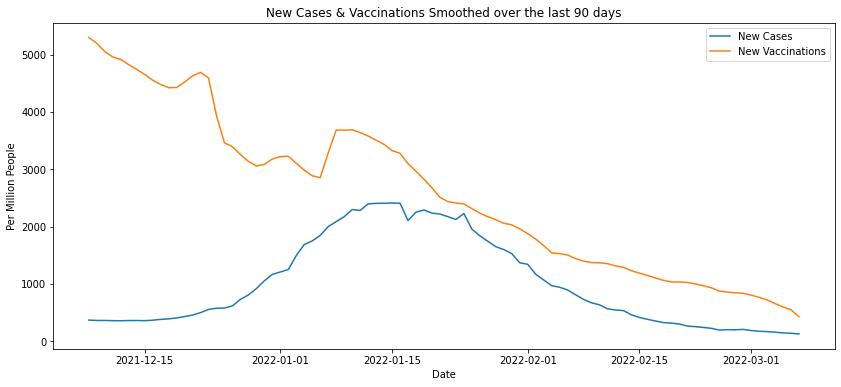

In [67]:
# Increase the size of the plot
plt.figure(figsize=(14,6))

# Label the axes and give it a title
plt.title("New Cases & Vaccinations Smoothed over the last 90 days")
plt.xlabel("Date")
plt.ylabel("Per Million People")

# Now to tackle the 1e6 x-axis
plt.ticklabel_format(style="plain", axis="y")

sns.lineplot(data=data["new_cases_smoothed_per_million"].tail(90), label="New Cases")
sns.lineplot(data=data["new_vaccinations_smoothed_per_million"].tail(90), label="New Vaccinations")

In [60]:
data.columns

Index(['total_cases', 'total_cases_per_million', 'stringency_index',
       'new_cases', 'new_cases_per_million',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million',
       'new_cases_smoothed', 'new_cases_smoothed_per_million', 'total_deaths',
       'new_deaths', 'total_deaths_per_million', 'new_deaths_per_million',
       'new_tests', 'total_tests', 'total_tests_per_thousand',
       'new_tests_per_thousand', 'tests_units', 'reproduction_rate',
       'new_deaths_smoothed', 'new_deaths_smoothed_per_million',
       'positive_rate', 'tests_per_case', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'total_vaccinations_pe